In [3]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
data2 = pd.read_csv("./train.csv")
data1 = pd.read_csv("./test.csv")

In [5]:
data = pd.concat([data2,data1])

In [6]:
data.to_csv('data.csv',index=False)

#### Data Cleaning
The columns in the dataframe are cleaned and reorganized:
* Column names are renamed.
* Rows with NAN values are removed.
* Rows with scores of 0 in the survey of satisfaction are removed (Customers probably did not indicate).
* Satisfaction target is relabelled as 0 and 1.

In [7]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
103899    103899
103900    103900
103901    103901
103902    103902
103903    103903
Name: Unnamed: 0, Length: 129880, dtype: int64

In [9]:
data.pop('id')

0         19556
1         90035
2         12360
3         77959
4         36875
          ...  
103899    94171
103900    73097
103901    68825
103902    54173
103903    62567
Name: id, Length: 129880, dtype: int64

In [10]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Vérifier le nombre de colonnes et de lignes

In [11]:
data.shape

(129880, 23)

Vérifier puis supprimer les valeurs NAN

In [12]:
print("Is there any missing value?",data.isnull().values.any())

Is there any missing value? True


In [13]:
data.isnull().sum().sum()

393

In [14]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [15]:
data.dropna(subset =['Arrival Delay in Minutes'],inplace=True)

In [16]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [17]:
data.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

#replace 0 values in some columns because 0 are considered in the survey as not applicable

Rename leg room service to leg room

In [18]:
data = data.rename(columns={'Leg room service':'Leg Room'})

Convert to float Departure delay in Minutes

In [19]:
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].astype('float')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    1294

In [21]:
data = data[(data['Inflight wifi service']!=0)&(data['Departure/Arrival time convenient']!=0)&(data['Ease of Online booking']!=0)&(data['Gate location'])&(data['Food and drink']!=0)&(data['Online boarding']!=0)&(data['Seat comfort']!=0)&(data['Inflight entertainment']!=0)&(data['On-board service']!=0)&(data['Leg Room']!=0)&(data['Baggage handling']!=0)&(data['Checkin service']!=0)&(data['Inflight service']!=0)&(data['Cleanliness']!=0)]


In [22]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0.0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0.0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0.0,0.0,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0.0,0.0,satisfied
10,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,1,...,3,3,4,3,1,3,4,29.0,19.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,...,4,4,4,4,4,4,4,9.0,7.0,satisfied
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3.0,0.0,neutral or dissatisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7.0,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0.0,0.0,neutral or dissatisfied


Change satisfaction by 1 and O : 1 for satisfied and 0 for neutral or dissatisfied 

In [23]:
data['satisfaction'] = data['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [24]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0.0,0.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0.0,20.0,1
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0.0,0.0,1
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0.0,0.0,1
10,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,1,...,3,3,4,3,1,3,4,29.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,...,4,4,4,4,4,4,4,9.0,7.0,1
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3.0,0.0,0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7.0,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0.0,0.0,0


In [25]:
data['Inflight wifi service'].value_counts()

3    20681
1    14925
2    13417
5    10977
4     9066
Name: Inflight wifi service, dtype: int64

In [26]:
#Pandas profilling

In [27]:
profile = ProfileReport(data, title ='Pandas Profiling Report', explorative=True)

In [28]:
profile.to_file("satisfaction.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
data.to_csv("data.csv", index=False)

In [30]:
df1 = pd.get_dummies(data,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)
df1

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0.0,0.0,1,0,0,0,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0.0,20.0,1,0,0,0,1,0
5,16,311,3,3,3,3,5,5,3,5,...,2,5,0.0,0.0,1,1,0,0,1,0
6,77,3987,5,5,5,5,3,5,5,5,...,5,3,0.0,0.0,1,0,0,0,0,0
10,47,1235,4,1,1,1,5,1,5,3,...,3,4,29.0,19.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103897,60,1599,5,5,5,5,5,5,4,4,...,4,4,9.0,7.0,1,0,0,0,0,0
103899,23,192,2,1,2,3,2,2,2,2,...,3,2,3.0,0.0,0,0,1,0,1,0
103901,30,1995,1,1,1,3,4,1,5,4,...,5,4,7.0,14.0,0,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,4,1,0.0,0.0,0,0,1,0,1,0


## Exploratory Data Analysis and Feature Selection

#### Create vizualization to better analyze the data

/var/folders/5p/sy2kb5_d3v54qld5xj813vh80000gn/T/ipykernel_61083/2748610431.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


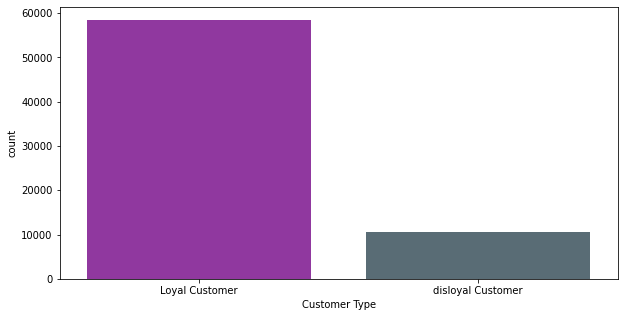

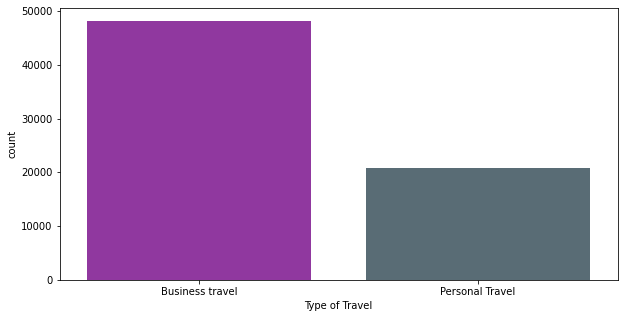

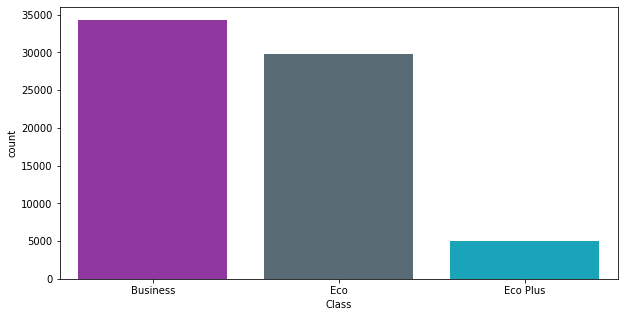

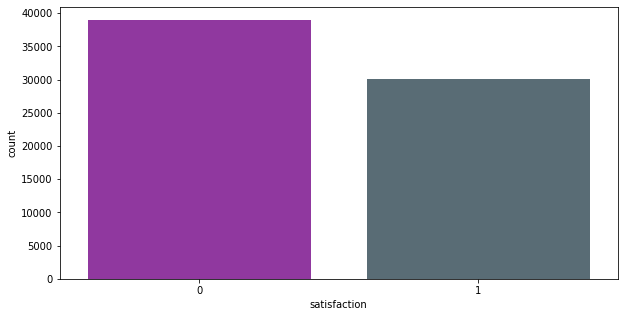

In [31]:
pal = ["#9c27b0", "#546e7a","#00b8d4"]
category=["Gender","Customer Type","Type of Travel","Class","satisfaction"]
for col in category:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,data=data, palette=pal)
    plt.show()
    %matplotlib inline

The first graphics illustrates the repartition of travellers : first, the repartition between men and women, the type of customer. We can see from the graph that the ratio between business travel and personal travel is high. We can make an hypothese that explain wh thre is much more traveler in Business class than in any other class, as business traval are usually organized by companies and are made in business class.
The ratio between the Unsastified and satisfied customer is also high, as the unsatisfied customer response also include the neutral responses.

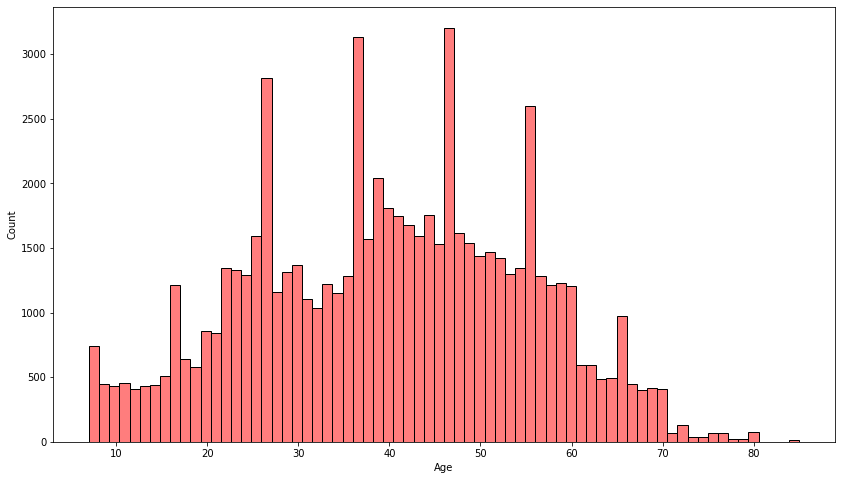

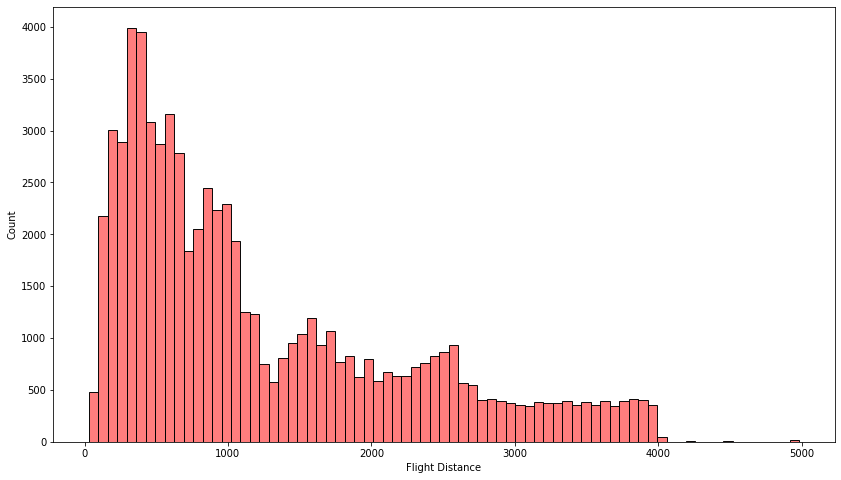

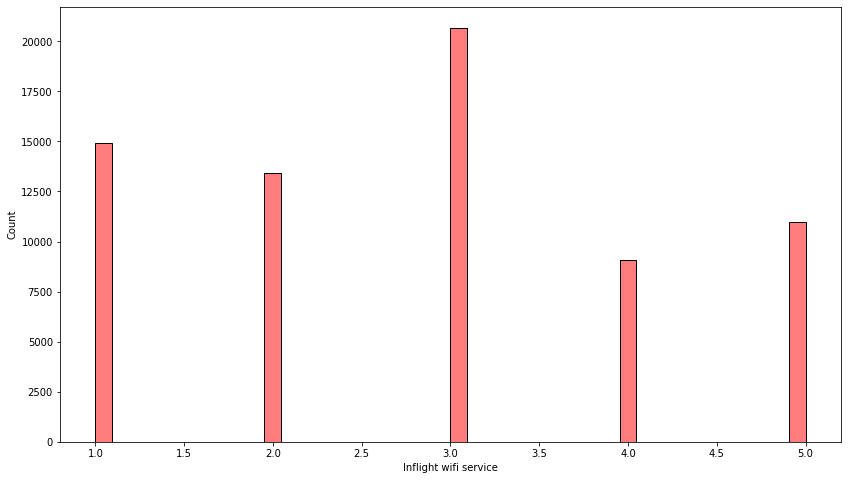

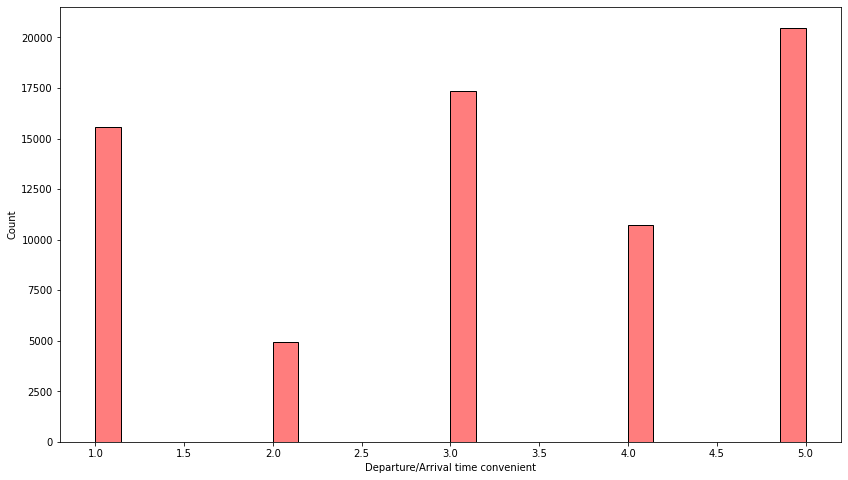

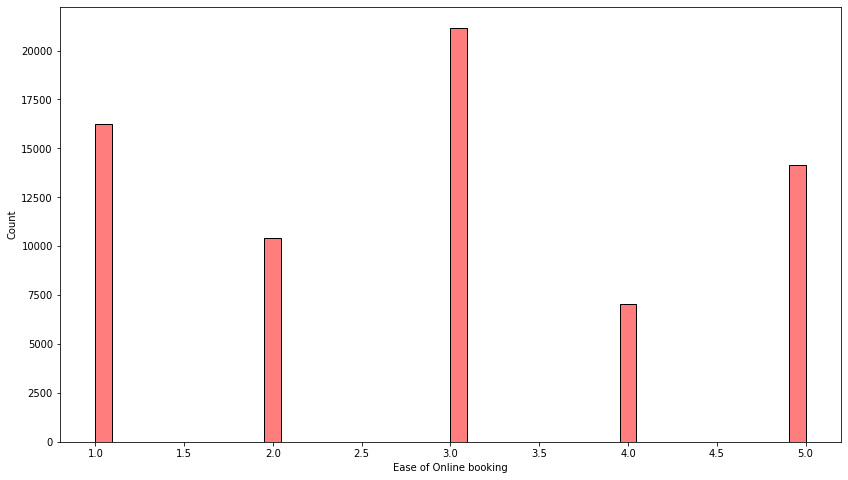

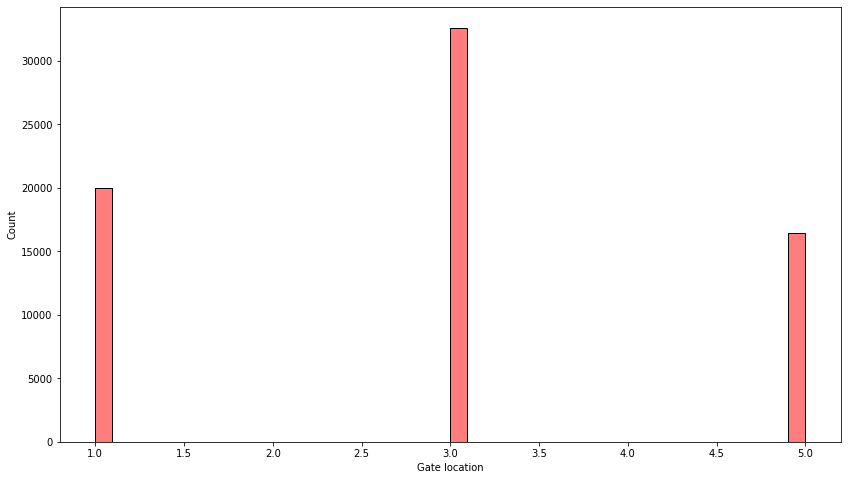

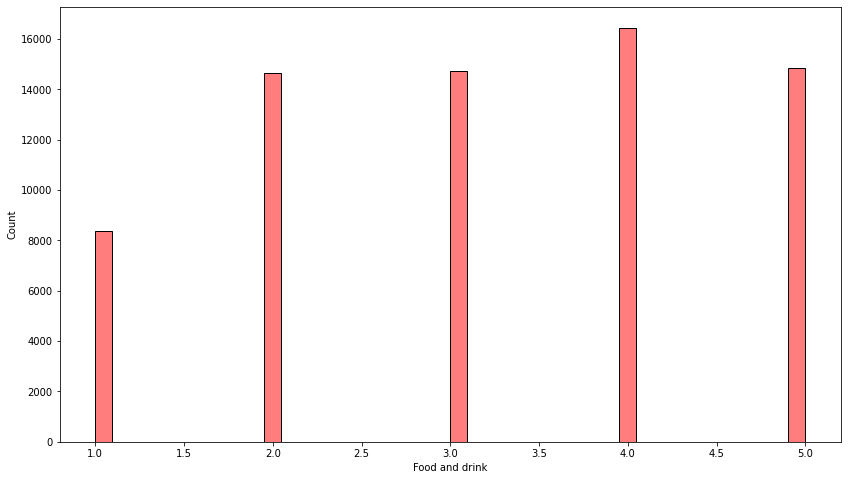

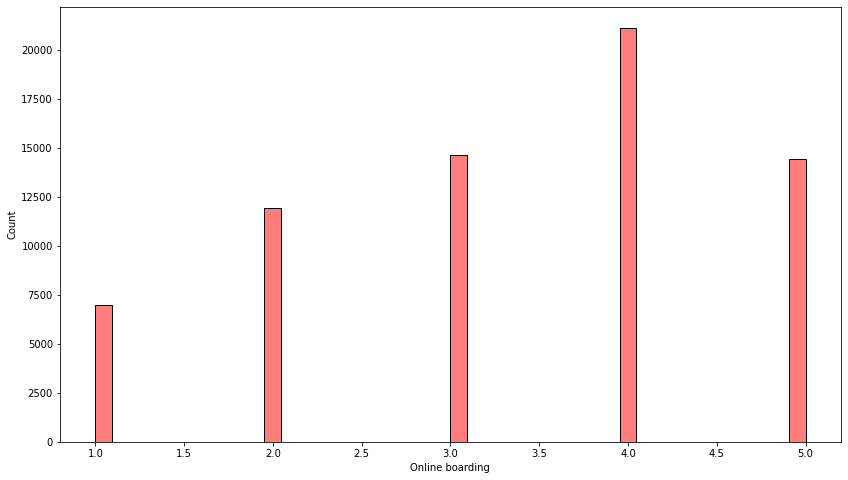

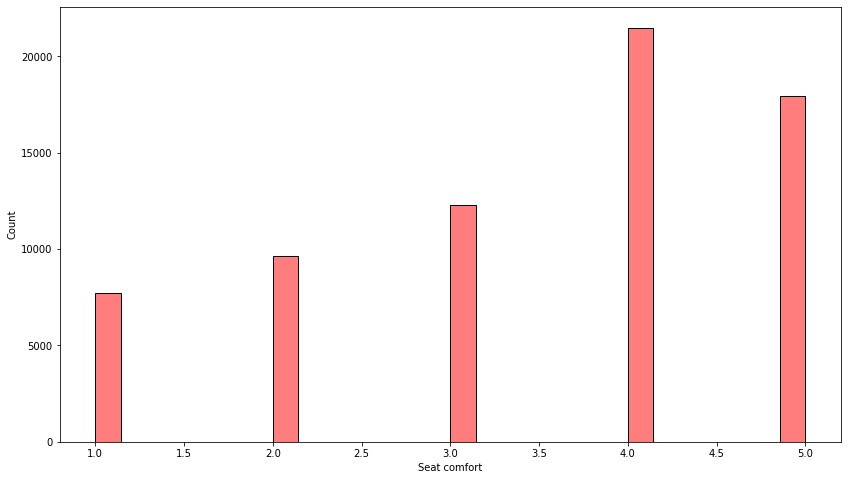

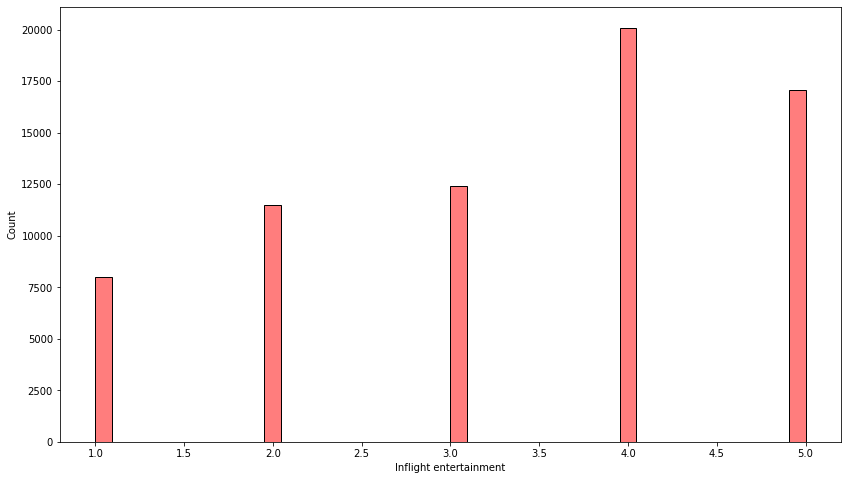

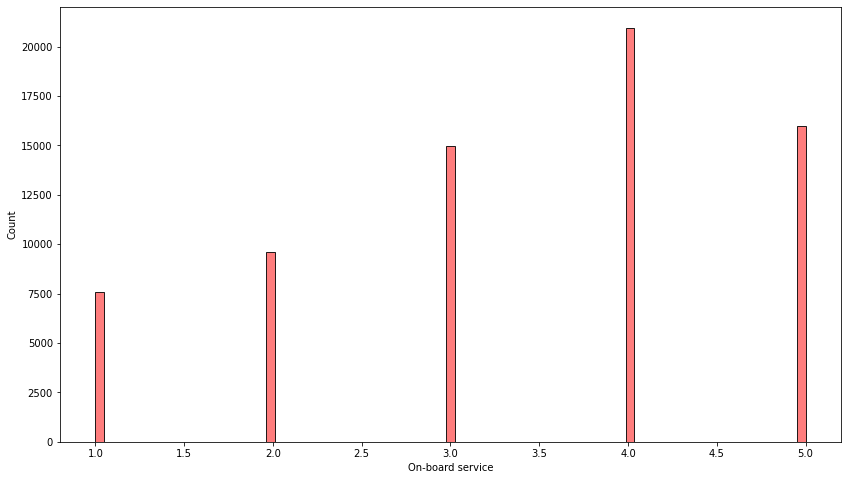

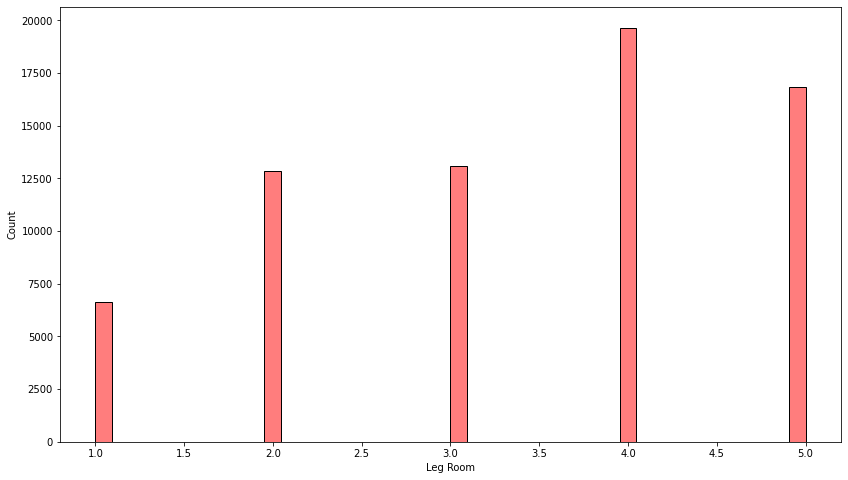

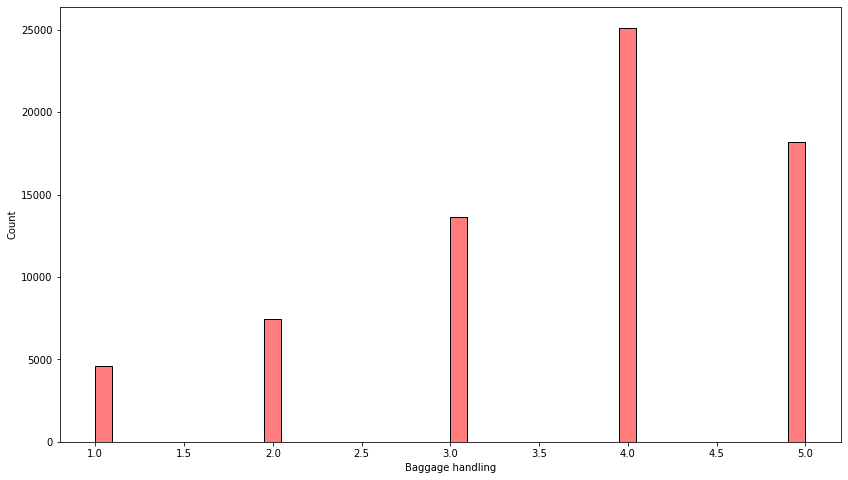

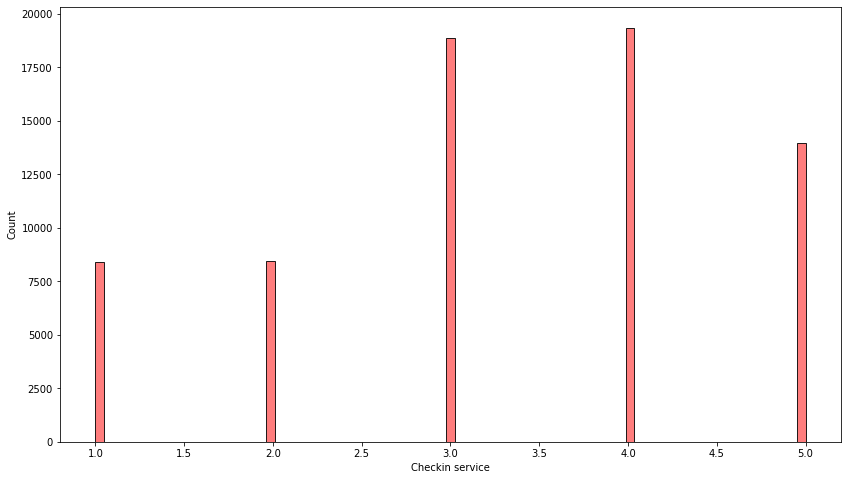

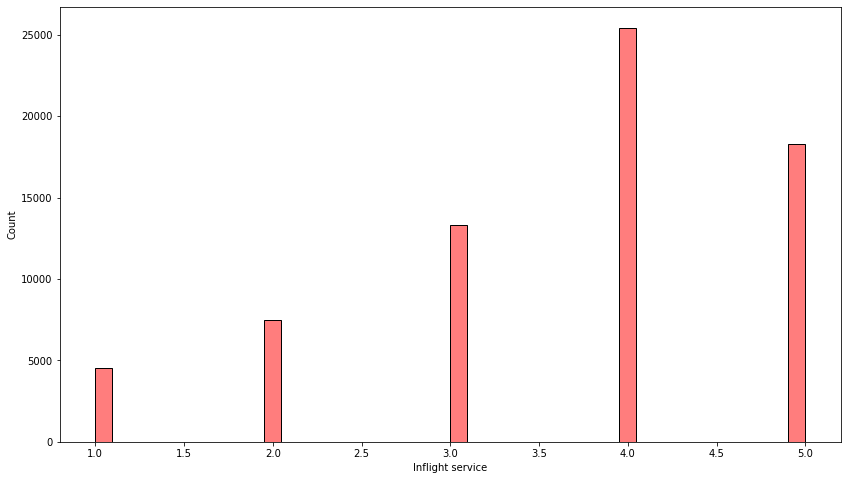

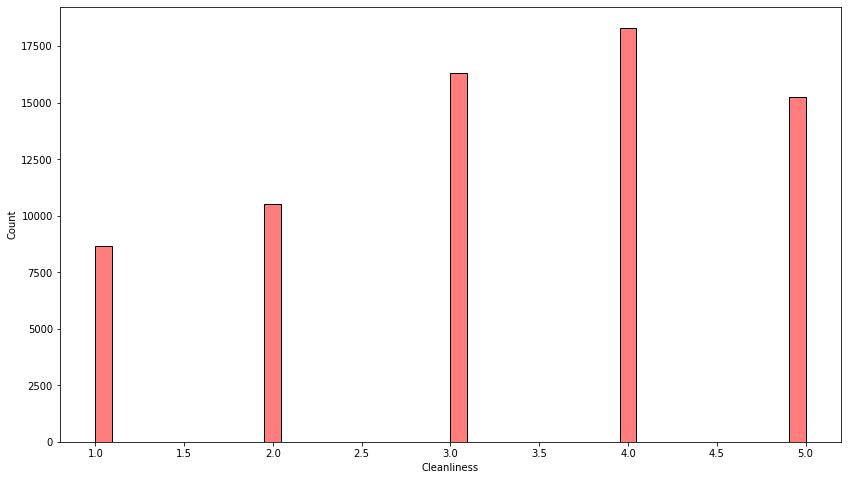

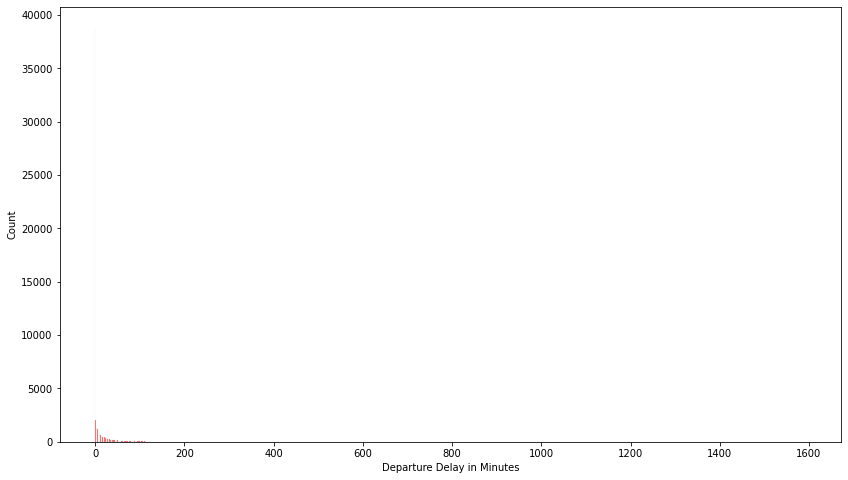

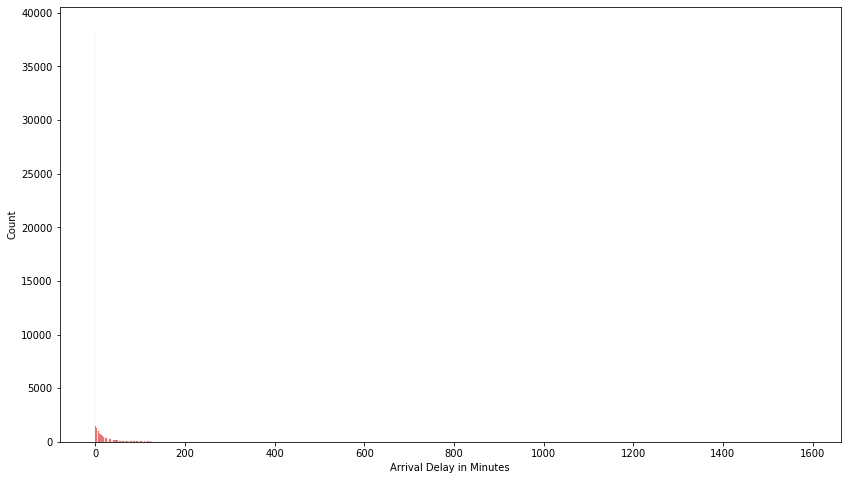

In [32]:
for col in data.columns:
    if col not in category:
        plt.figure(figsize=(14,8))
        sns.histplot(data[col], color="#ff5252")
        plt.show()

Concerning the arrival delay in minutes and the departure delay in minutes : 
in order to improve the vizualization of the data, we decided to remove outliers from the two columns concerning the departure and the arrival delay in minutes. As for the "gate location" column there is only data on 1,0, 3.0 and 5.0 values which can mean that there is missing values.

<AxesSubplot:>

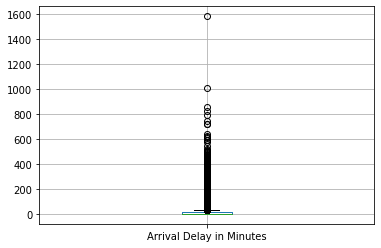

In [36]:
data.boxplot("Arrival Delay in Minutes")

<AxesSubplot:>

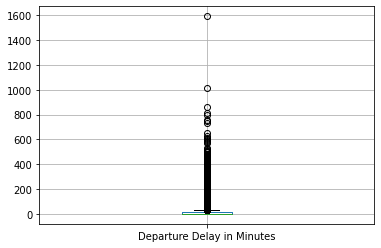

In [34]:
data.boxplot("Departure Delay in Minutes")

In [38]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000
mean,40.000376,1234.754858,2.822677,3.227029,2.890815,2.896099,3.212912,3.349955,3.466756,3.387195,3.407639,3.393696,3.648684,3.318666,3.658877,3.303333,14.838358,15.281224,0.435743
std,14.967688,1003.694541,1.339493,1.504212,1.415409,1.449267,1.323239,1.262698,1.311368,1.326482,1.280425,1.293872,1.171475,1.263832,1.168167,1.307958,37.925639,38.395169,0.495857
min,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,444.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,883.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1814.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [39]:
#removing outliers 
def remove_outlier(df_in, Arrival_Delay_in_Minutes):
    q1 = df_in[Arrival_Delay_in_Minutes].quantile(0.25)
    q3 = df_in[Arrival_Delay_in_Minutes].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[Arrival_Delay_in_Minutes] > fence_low) & (df_in[Arrival_Delay_in_Minutes] < fence_high)]
    return df_out

In [ ]:
#Overall satisfaction

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

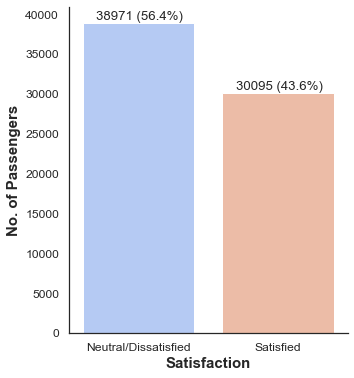

In [43]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=data,x='satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(data)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

In [ ]:
#Satisfaction by gender 

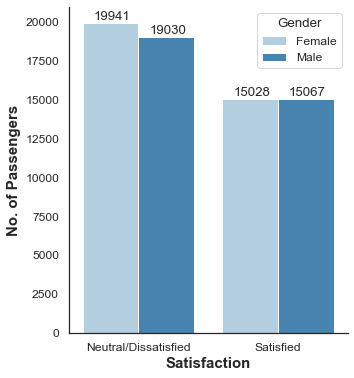

In [45]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=data,x='satisfaction',hue='Gender',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

In [ ]:
#Satisfaction by reason for travel 

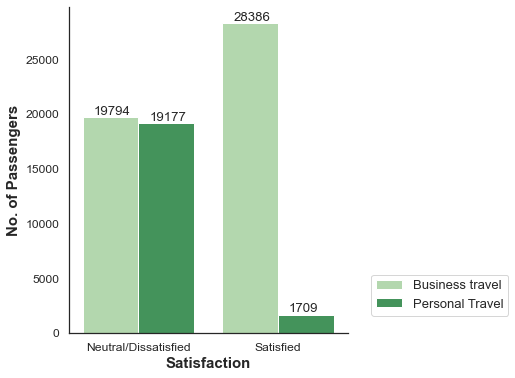

In [44]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=data,x='satisfaction',hue='Type of Travel',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

We can see that overall satisfaction is relatively even by gender but it changes when types of travel are taken into account. 

In [ ]:
#Heat Map to measure correlation

In [ ]:
corr_matrix = data.corr()
corr_matrix.head()

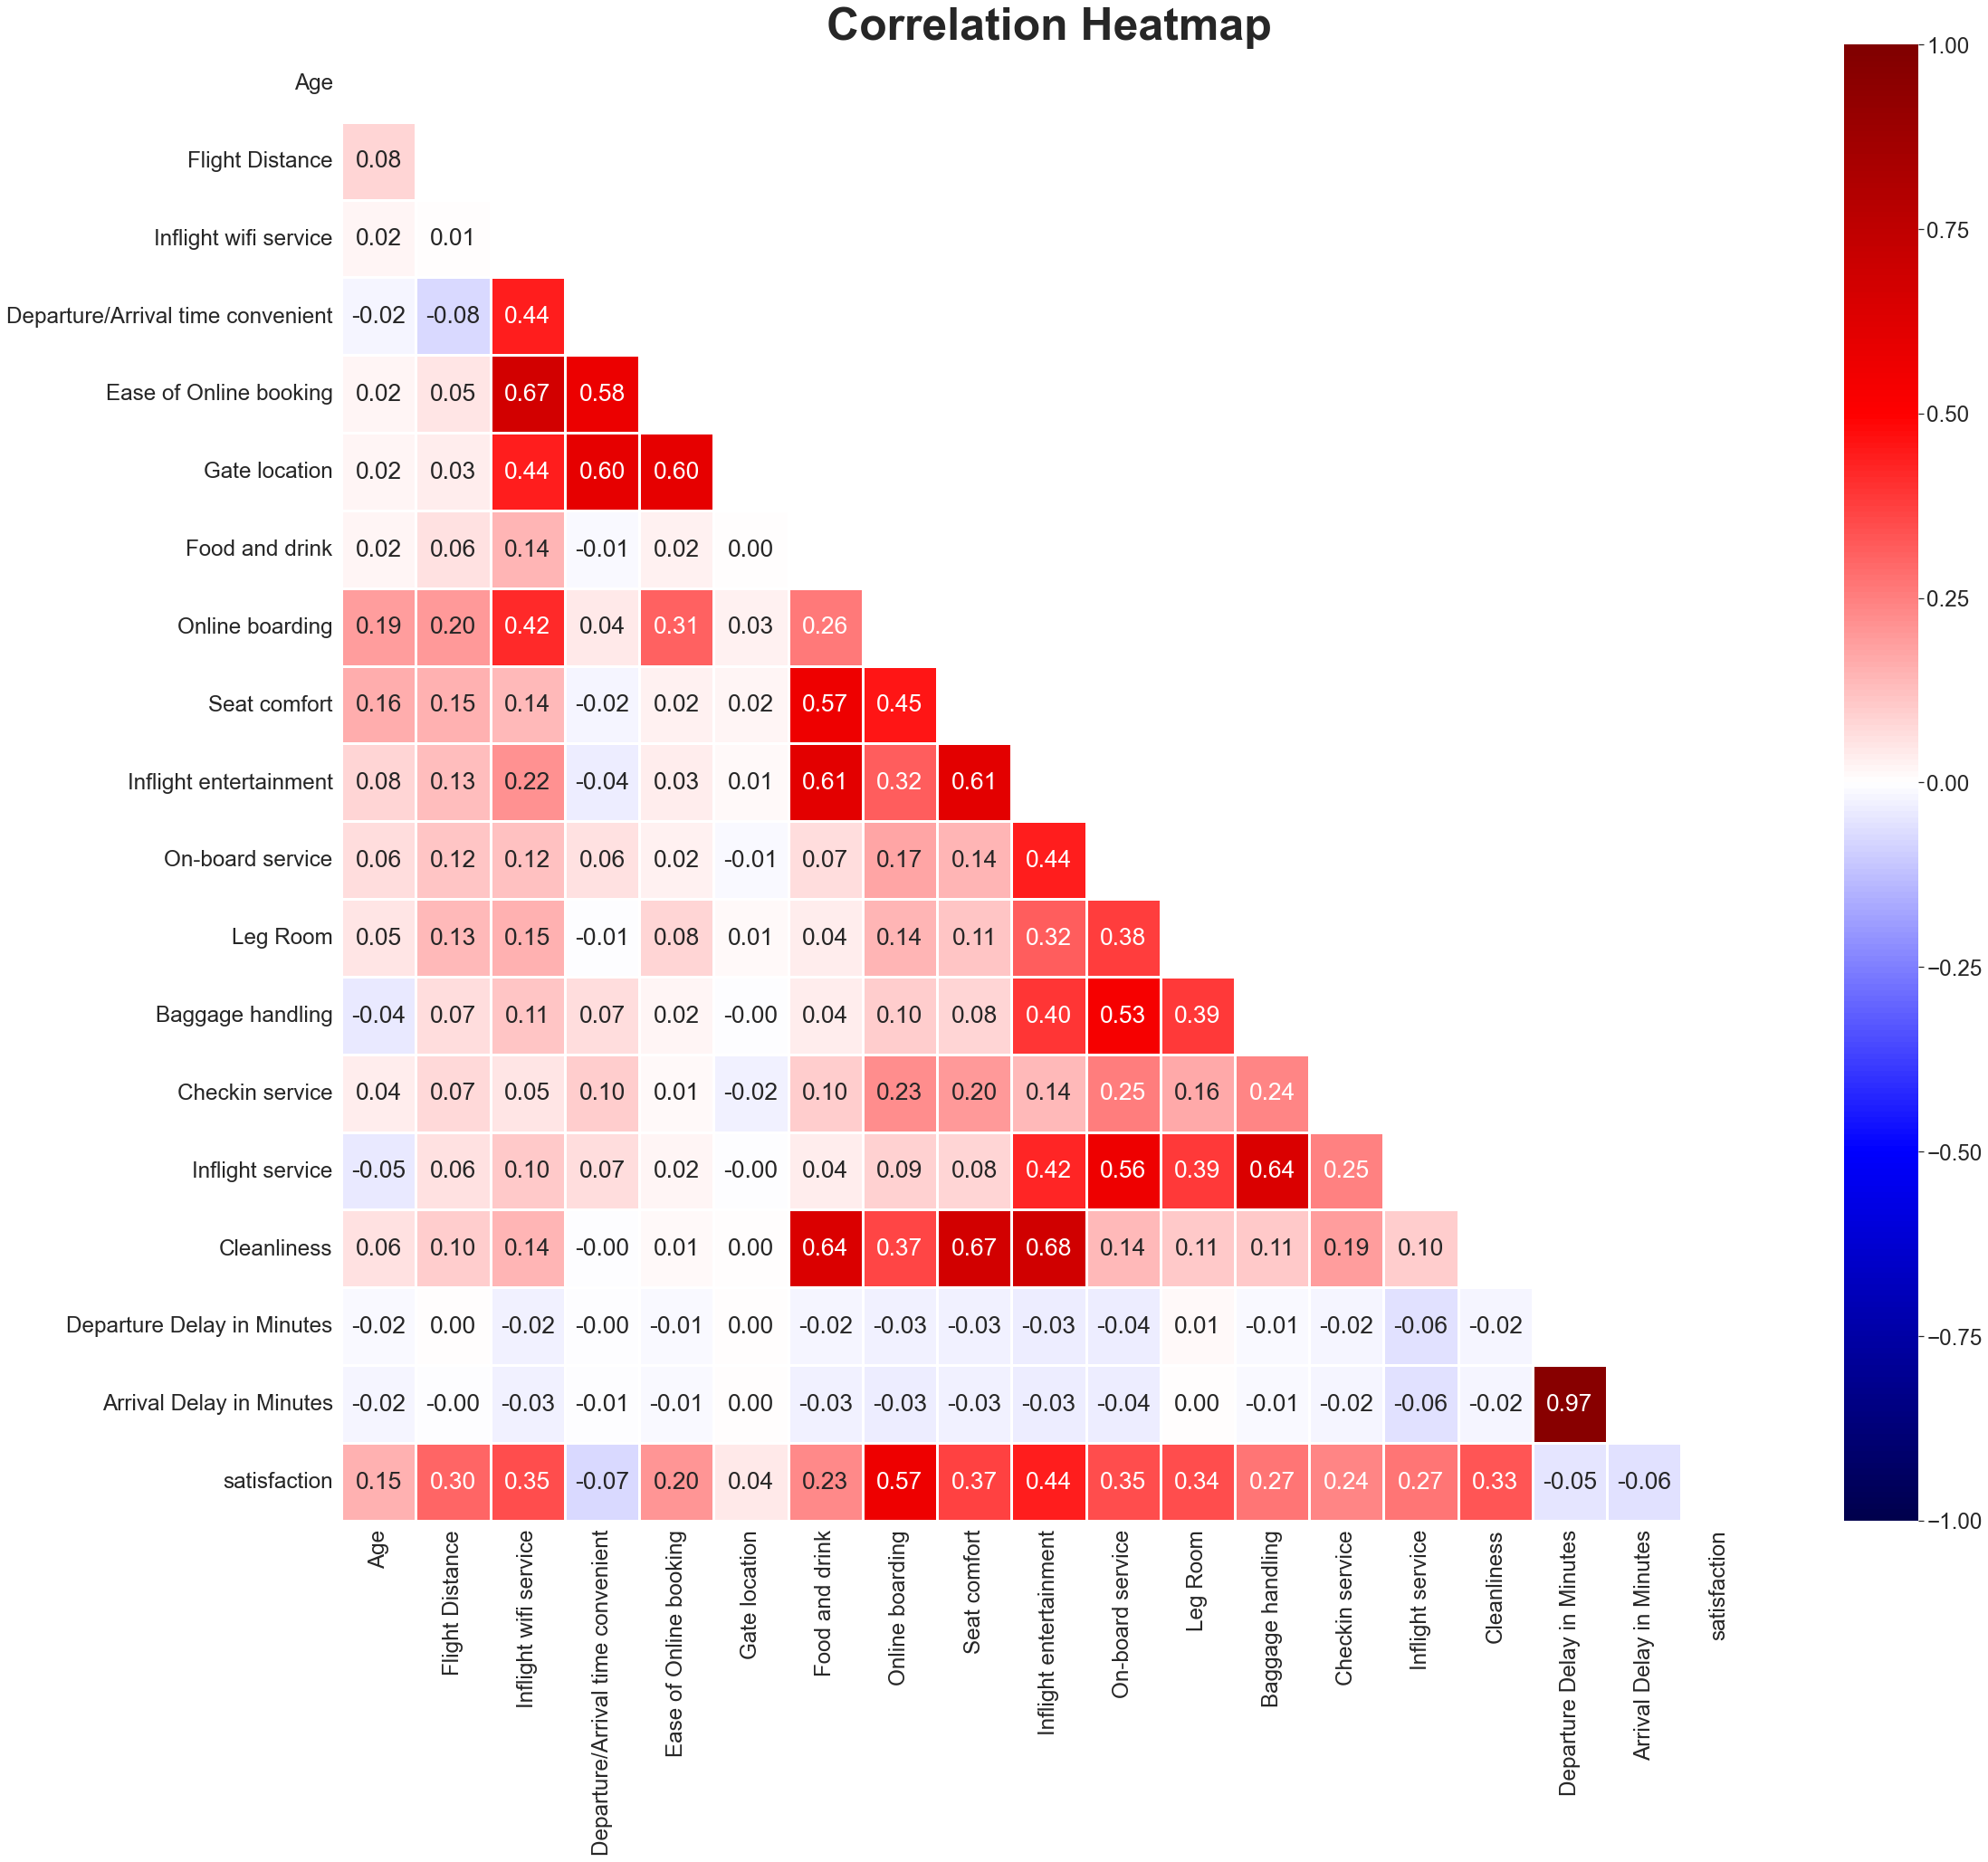

In [60]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

In [ ]:
# Reset of index to get rid of duplicated entries
# in order for visualizations to display correectly

In [87]:
data[data.index.duplicated()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0.0,0.0,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9.0,23.0,0
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,5,2,2,2,4,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25957,Male,Loyal Customer,51,Personal Travel,Eco,209,4,4,4,1,...,1,4,4,3,5,1,1,0.0,0.0,0
25969,Male,Loyal Customer,18,Personal Travel,Eco,2419,4,2,4,3,...,1,3,3,4,4,3,4,0.0,0.0,0
25973,Male,Loyal Customer,55,Business travel,Business,277,5,5,4,5,...,5,5,5,5,4,5,4,0.0,0.0,1
25974,Male,Loyal Customer,39,Business travel,Business,325,1,1,1,1,...,4,4,4,4,5,4,4,0.0,0.0,1


In [88]:
data.reset_index(inplace=True)

In [89]:
data.head()

,index,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg Room,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0.0,0.0,1
1,4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0.0,20.0,1
2,5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0.0,0.0,1
3,6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0.0,0.0,1
4,10,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,1,...,3,3,4,3,1,3,4,29.0,19.0,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

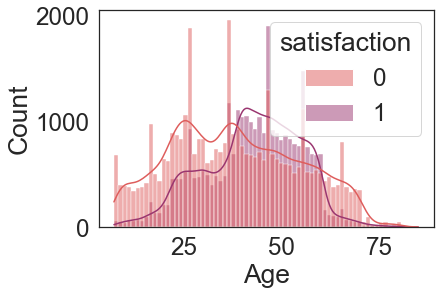

In [92]:
sns.histplot(x='Age',hue="satisfaction",data=data,kde=True,palette="flare")

We can see that when comparing age by level of satisfaction there are still outlier entries for netural/dissatisfied.  However mid-age entries tend to be overall even between satisifed or dissatisfied. 

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

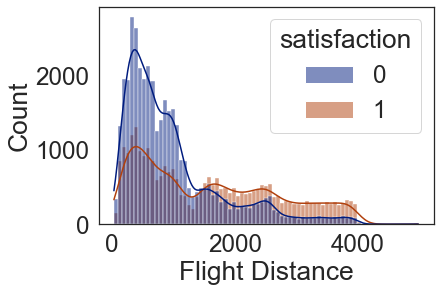

In [94]:
sns.histplot(x='Flight Distance',hue="satisfaction",data=data,kde=True,palette="dark")

As for satisfaction by flight distance, there are far more entries for lower distances and it also has more chances of leaving passengers dissatisfied. The finding are inversed as disntances approach and surpass the 2000 mark. 

(0.0, 7.0)

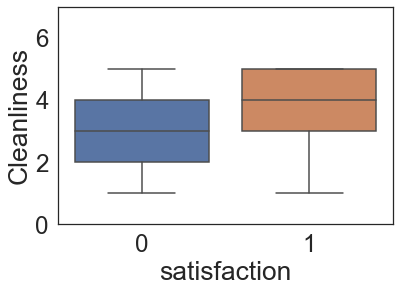

In [113]:
sns.boxplot(x="satisfaction", y="Cleanliness", data=data)
plt.ylim(0,7)

(0.0, 7.0)

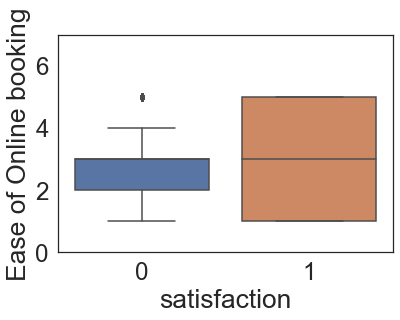

In [112]:
sns.boxplot(x="satisfaction", y="Ease of Online booking", data=data)
plt.ylim(0,7)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

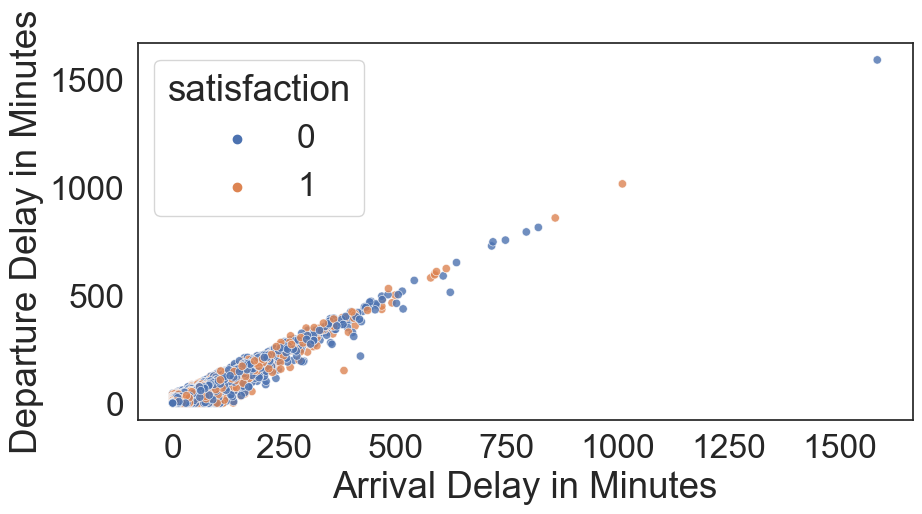

In [108]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=data,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction', alpha=0.8)

The arrival and departure delay times seems to have a linear relationship.

(0.0, 1000.0)

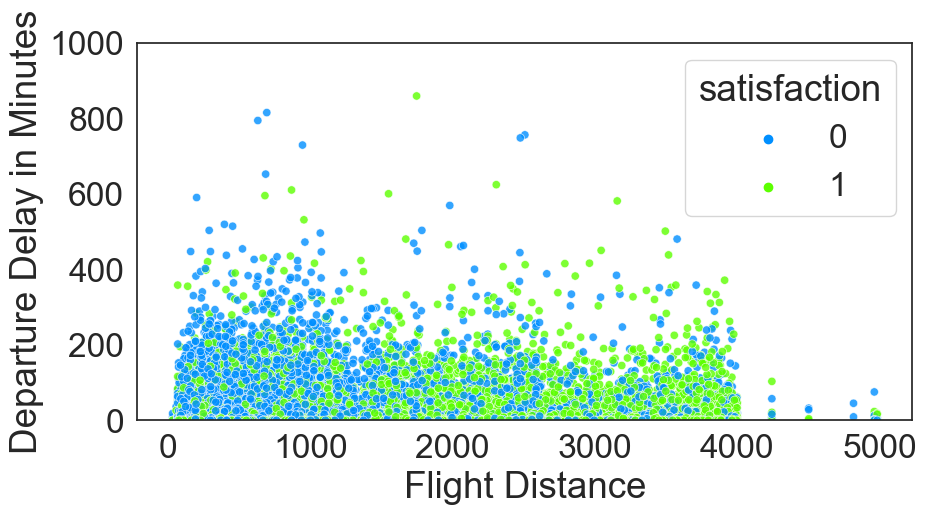

In [106]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=data,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

In comparing departure delay in minutes to flight distance, the relationship is still relatively linear as well. However, more customers are dissatisfied/neutral when the departure delay in minutes is lower - so further research into other variables might be useful. 